# Aizarani N. et al. Human Liver (CEL-seq)

## Reference:    
[Aizarani N, Saviano A, Sagar, Mailly L et al. A human liver cell atlas reveals heterogeneity and epithelial progenitors. Nature 2019 Aug;572(7768):199-204.](https://www.ncbi.nlm.nih.gov/pubmed/31292543)

## GEO:    
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE124395

In [1]:
%pylab inline

import warnings
warnings.filterwarnings("ignore")

from SCCAF import *

Populating the interactive namespace from numpy and matplotlib


download counts

In [2]:
cts = pd.read_csv("ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE124nnn/GSE124395/suppl/GSE124395_Normalhumanlivercellatlasdata.txt.gz",\
                 sep='\t',index_col=0)

In [3]:
cts.head()

ASGR1_CD45_UNB_P4_5_14  ASGR1_CD45_UNB_P4_5_16  \
5_8S_rRNA                     0.0                     0.0   
5S_rRNA                       0.0                     0.0   
7SK                           0.0                     0.0   
A1BG                          0.0                     0.0   
A1BG-AS1                      0.0                     0.0   

           ASGR1_CD45_UNB_P4_5_19  ASGR1_CD45_UNB_P4_5_26  \
5_8S_rRNA                     0.0                     0.0   
5S_rRNA                       0.0                     0.0   
7SK                           0.0                     0.0   
A1BG                          0.0                     0.0   
A1BG-AS1                      0.0                     0.0   

           ASGR1_CD45_UNB_P4_5_27  ASGR1_CD45_UNB_P4_5_30  \
5_8S_rRNA                     0.0                     0.0   
5S_rRNA                       0.0                     0.0   
7SK                           0.0                     0.0   
A1BG                          0.0                     0.0   
A1BG-AS1                      0.0                     0.0   

           ASGR1_CD45_UNB_P4_5_35  ASGR1_CD45_UNB_P4_5_50  \
5_8S_rRNA                     0.0                     0.0   
5S_rRNA                       0.0                     0.0   
7SK                           0.0                     0.0   
A1BG                          0.0                     0.0   
A1BG-AS1                      0.0                     0.0   

           ASGR1_CD45_UNB_P4_5_51  ASGR1_CD45_UNB_P4_5_54  ...  \
5_8S_rRNA                     0.0                     0.0  ...   
5S_rRNA                       0.0                     0.0  ...   
7SK                           0.0                     0.0  ...   
A1BG                          0.0                     0.0  ...   
A1BG-AS1                      0.0                     0.0  ...   

           Trop2pos315_3_82  Trop2pos315_3_83  Trop2pos315_3_84  \
5_8S_rRNA               0.0               0.0               0.0   
5S_rRNA                 0.0               0.0               0.0   
7SK                     0.0               0.0               0.0   
A1BG                    0.0               0.0               0.0   
A1BG-AS1                0.0               0.0               0.0   

           Trop2pos315_3_86  Trop2pos315_3_88  Trop2pos315_3_89  \
5_8S_rRNA               0.0               0.0               0.0   
5S_rRNA                 0.0               0.0               0.0   
7SK                     0.0               0.0               0.0   
A1BG                    0.0               0.0               0.0   
A1BG-AS1                0.0               0.0               0.0   

           Trop2pos315_3_91  Trop2pos315_3_92  Trop2pos315_3_93  \
5_8S_rRNA               0.0               0.0               0.0   
5S_rRNA                 0.0               0.0               0.0   
7SK                     0.0               0.0               0.0   
A1BG                    0.0               0.0               0.0   
A1BG-AS1                0.0               0.0               0.0   

           Trop2pos315_3_96  
5_8S_rRNA               0.0  
5S_rRNA                 0.0  
7SK                     0.0  
A1BG                    0.0  
A1BG-AS1                0.0  

[5 rows x 12622 columns]

In [4]:
cts.shape

(33941, 12622)

In [5]:
obs = pd.read_csv("ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE124nnn/GSE124395/suppl/GSE124395_clusterpartition.txt.gz",\
                  sep=' ',index_col=0)

In [6]:
ad = sc.AnnData(scipy.sparse.csr_matrix(cts.values.T))
ad.obs_names = cts.columns
ad.var_names = cts.index
ad = ad[ad.obs_names.isin(obs.index),:]
ad.obs = obs.loc[ad.obs_names]

In [7]:
ad

AnnData object with n_obs × n_vars = 10372 × 33941 
    obs: 'sct@cpart'

In [3]:
ad.raw = sc.pp.log1p(ad,copy=True)

> the cluster-cell mapping is according to the Fig 1 of the paper: https://www.nature.com/articles/s41586-019-1373-2#Sec4

In [9]:
dd = {1:'NK/T',
 2:'Kupffer',
 3:'NK/T',
 4:'Cholangiocytes',
 5:'NK/T',
 6:'Kupffer',
 7:'Cholangiocytes',
 8:'B cell',
 9:'Endothelial',
 10:'Endothelial',
 11:'Hepatocytes',
 12:'NK/T',
 13:'Endothelial',
 14:'Hepatocytes',
 15:'Endothelial',
 16:'Others',
 17:'Hepatocytes',
 18:'NK/T',
 19:'Others',
 20:'Endothelial',
 21:'Stellate',
 22:'B cell',
 23:'Kupffer',
 24:'Cholangiocytes',
 25:'Kupffer',
 26:'Endothelial',
 27:'Others',
 28:'NK/T',
 29:'Endothelial',
 30:'Hepatocytes',
 31:'Kupffer',
 32:'Endothelial',
 33:'Stellate',
 34:'B cell',
 35:'Endothelial',
 36:'Others',
 37:'B cell',
 38:'B cell',
 39:'Cholangiocytes',}

In [10]:
ad.obs['cell'] = ad.obs['sct@cpart'].astype(int).map(dd)

In [4]:
ad.write("../write/Aizarani2019Liver.h5")

In [30]:
ad = sc.read("../write/Aizarani2019Liver.h5")

In [31]:
ad.obs['batch'] = ad.obs_names.str.split('_').str[:-2].str.join('_')

In [32]:
sc.pp.filter_cells(ad, min_genes=200)
sc.pp.filter_genes(ad, min_cells=3)
sc.pp.filter_genes(ad, min_cells=20)

In [13]:
ad.obs['n_counts'] = ad.X.sum(axis=1)
ad.obs['n_genes'] = (ad.X>0).sum(axis=1)
# ad.var_names_make_unique()

In [33]:
sc.pp.normalize_per_cell(ad, counts_per_cell_after=1e4)
sc.pp.log1p(ad)

In [34]:
ad.obs['batch'] = ad.obs['batch'].astype(str)

In [35]:
ad.write("tmp.h5")

... storing 'batch' as categorical


In [38]:
ad = sc.read("tmp.h5")

In [40]:
sc.pp.regress_out(ad,keys=['batch'])

In [41]:
# sc_pp_regress_out(ad,keys=['batch'])
# sc.pp.scale(ad, max_value=10)
sc.tl.pca(ad)

In [42]:
ad.write("tmp.h5")

In [43]:
# sc.tl.tsne(ad, n_pcs=50)
sc.pp.neighbors(ad, n_pcs=50)
sc.tl.umap(ad)
sc.tl.louvain(ad, resolution=0.5)

In [44]:
ad.obs['sct@cpart'] = ad.obs['sct@cpart'].astype(str)

In [45]:
ad.uns['cell_colors'] = default_20

... storing 'sct@cpart' as categorical


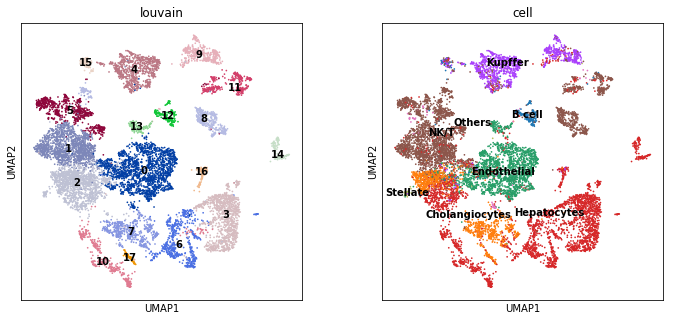

In [46]:
figsize(5,5)
sc.pl.umap(ad, color=['louvain','cell'], legend_loc='on data')

In [ ]:
figsize(5,5)
sc.pl.tsne(ad, color=['louvain','cell'], legend_loc='on data')

In [20]:
ad.write("../write/Aizarani2019Liver_reg.h5")

In [2]:
ad = sc.read("../write/Aizarani2019Liver_reg.h5")

In [13]:
ad.obs['batch'] = ad.obs_names.str.split('_').str[:-2].str.join('_')

In [19]:
ad.obs['batch'].value_counts().shape

(41,)

In [20]:
ad.uns['batch_colors'] =  default_64

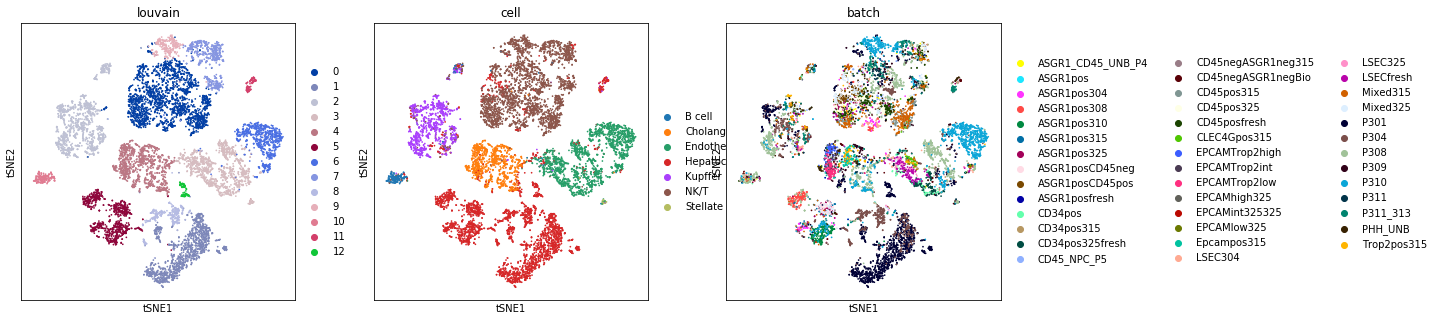

In [22]:
figsize(5,5)
sc.pl.tsne(ad, color=['louvain','cell','batch'])

In [23]:
ad = ad[~ad.obs['cell'].isin(['Others']),:]

In [24]:
sc.tl.pca(ad)

sc.tl.tsne(ad, n_pcs=50)

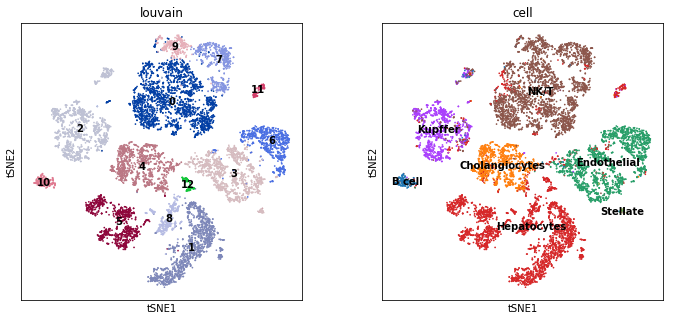

In [25]:
figsize(5,5)
sc.pl.tsne(ad, color=['louvain','cell'], legend_loc='on data')

In [26]:
sc.pp.neighbors(ad, n_pcs=50)

sc.tl.louvain(ad, resolution=0.3, key_added='louvain_r0.3')

sc.tl.louvain(ad, resolution=0.05, key_added='louvain_r0.05')

sc.tl.louvain(ad, resolution=1.5, key_added='louvain_r1.5')

sc.tl.louvain(ad, resolution=2.0, key_added='louvain_r2.0')

sc.tl.louvain(ad, resolution=2.5, key_added='louvain_r2.5')

In [27]:
ad.write("../write/Aizarani2019Liver_reg.h5")

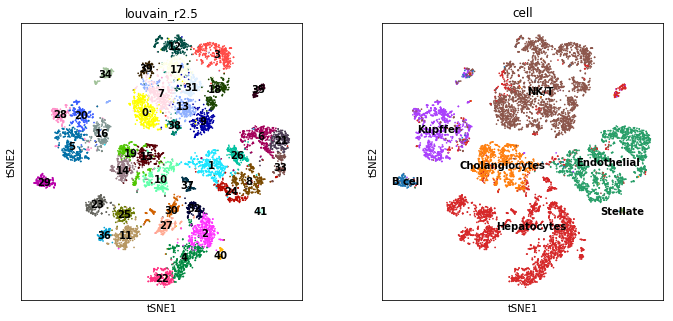

In [28]:
sc.pl.tsne(ad, color=['louvain_r2.5','cell'], legend_loc='on data')

In [29]:
ls -lh ../write/Aizarani2019Liver_reg.h5

-rw-r--r--  1 zmiao  384566875   276M  8 Oct 15:32 ../write/Aizarani2019Liver_reg.h5


# End

In [9]:
ad.obs['L1_Round0'] = ad.obs['louvain_r2.5']

In [2]:
ad = sc.read("../write/Aizarani2019Liver_reg.h5")

start_iter: 0
R1norm_cutoff: 0.500000
R2norm_cutoff: 0.050000
Accuracy: 0.000000
Round1 ...
Mean CV accuracy: 0.9013
Accuracy on the training set: 0.9618
Accuracy on the hold-out set: 0.9056


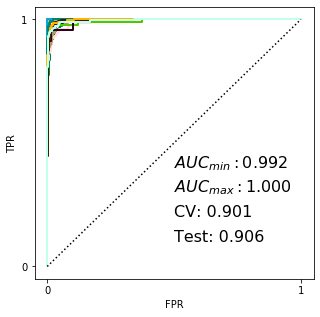

... storing 'L1_Round0_self-projection' as categorical


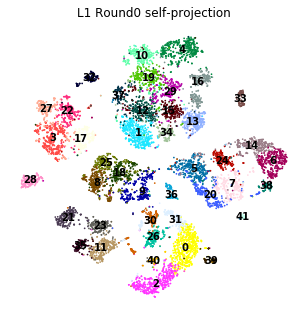

Accuracy on the training set: 0.9604
Accuracy on the hold-out set: 0.9079
Accuracy on the training set: 0.9646
Accuracy on the hold-out set: 0.8985
Max R1mat: 0.119048
Max R2mat: 0.002868
min_acc: 0.898497


<Figure size 360x360 with 0 Axes>

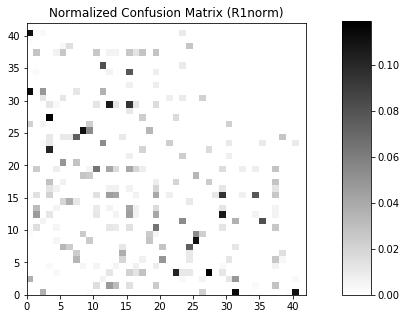

<Figure size 360x360 with 0 Axes>

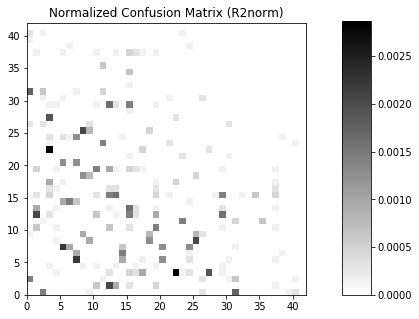

IGRAPH U-W- 42 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.119048
m2: 0.002868
Accuracy: 0.898497
start_iter: 0
R1norm_cutoff: 0.109048
R2norm_cutoff: 0.001868
Accuracy: 0.898497
Round1 ...
Mean CV accuracy: 0.9055
Accuracy on the training set: 0.9646
Accuracy on the hold-out set: 0.9071


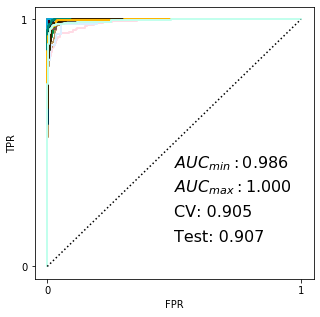

... storing 'L1_Round0_self-projection' as categorical


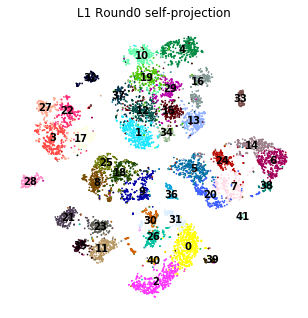

Accuracy on the training set: 0.9579
Accuracy on the hold-out set: 0.9086
Accuracy on the training set: 0.9573
Accuracy on the hold-out set: 0.8998
Max R1mat: 0.157895
Max R2mat: 0.002713
min_acc: 0.899836


<Figure size 360x360 with 0 Axes>

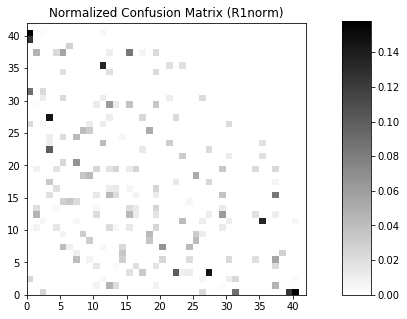

<Figure size 360x360 with 0 Axes>

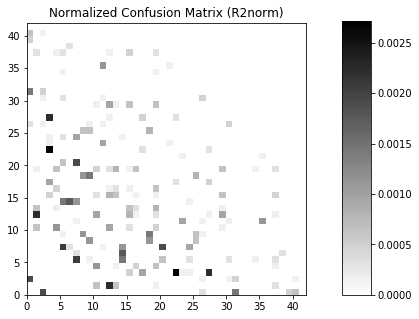

... storing 'L1_Round1' as categorical


IGRAPH U-W- 42 8 --
+ attr: weight (e)
+ edges:
0--39 0--40 3--27 11--35 3--27 11--35 0--39 0--40


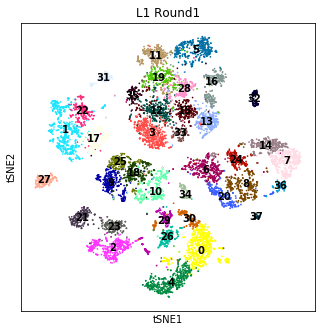

Round2 ...
Mean CV accuracy: 0.9048
Accuracy on the training set: 0.9590
Accuracy on the hold-out set: 0.9058


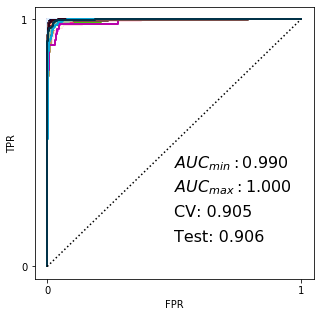

... storing 'L1_Round1_self-projection' as categorical


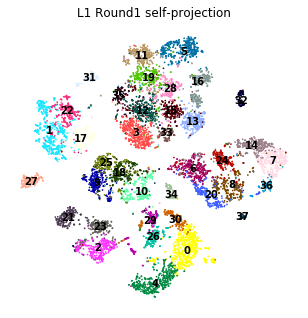

Accuracy on the training set: 0.9637
Accuracy on the hold-out set: 0.9089
Accuracy on the training set: 0.9640
Accuracy on the hold-out set: 0.9090
Max R1mat: 0.214876
Max R2mat: 0.004575
min_acc: 0.905843


<Figure size 360x360 with 0 Axes>

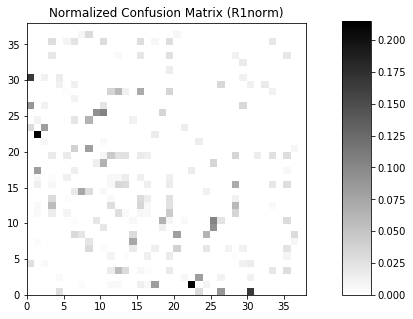

<Figure size 360x360 with 0 Axes>

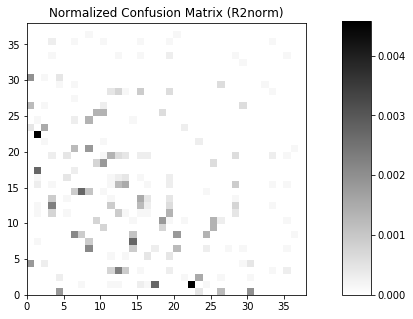

... storing 'L1_Round2' as categorical


IGRAPH U-W- 38 4 --
+ attr: weight (e)
+ edges:
0--30 1--22 1--22 0--30


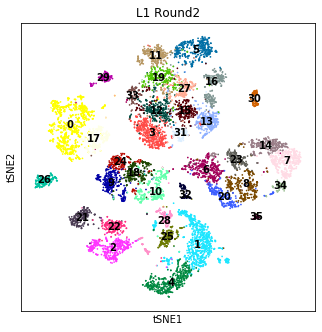

Round3 ...
Mean CV accuracy: 0.9082
Accuracy on the training set: 0.9625
Accuracy on the hold-out set: 0.9190


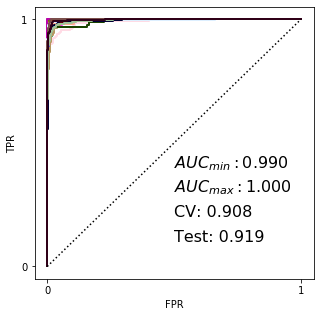

... storing 'L1_Round2_self-projection' as categorical


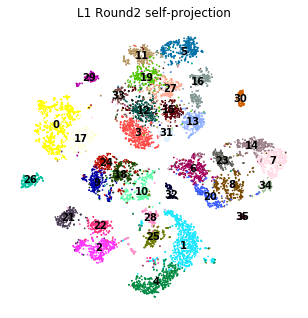

Accuracy on the training set: 0.9597
Accuracy on the hold-out set: 0.9137
Accuracy on the training set: 0.9594
Accuracy on the hold-out set: 0.9133
Max R1mat: 0.148649
Max R2mat: 0.004874
min_acc: 0.913264


<Figure size 360x360 with 0 Axes>

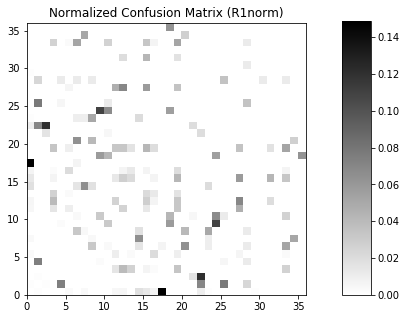

<Figure size 360x360 with 0 Axes>

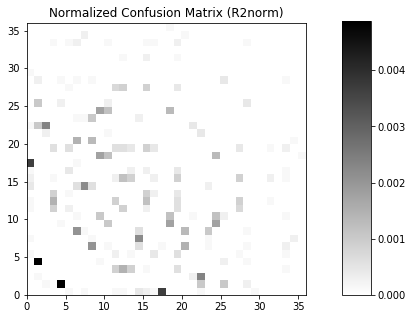

... storing 'L1_Round3' as categorical


IGRAPH U-W- 36 6 --
+ attr: weight (e)
+ edges:
0--17 2--22 9--24 0--17 2--22 9--24


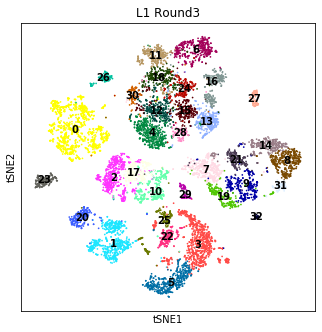

Round4 ...
Mean CV accuracy: 0.9191
Accuracy on the training set: 0.9638
Accuracy on the hold-out set: 0.9189


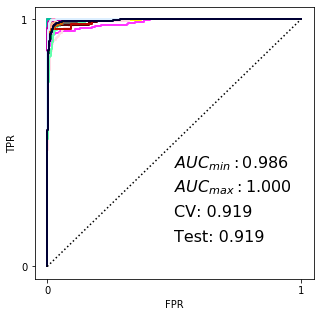

... storing 'L1_Round3_self-projection' as categorical


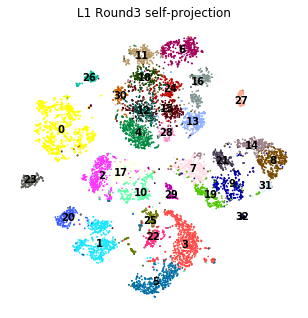

Accuracy on the training set: 0.9697
Accuracy on the hold-out set: 0.9169
Accuracy on the training set: 0.9669
Accuracy on the hold-out set: 0.9231
Max R1mat: 0.161074
Max R2mat: 0.004006
min_acc: 0.916903


<Figure size 360x360 with 0 Axes>

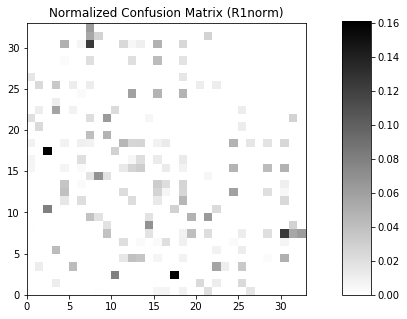

<Figure size 360x360 with 0 Axes>

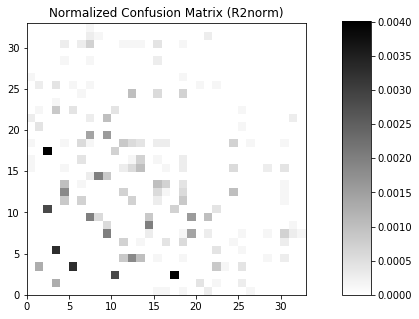

... storing 'L1_Round4' as categorical


IGRAPH U-W- 33 2 --
+ attr: weight (e)
+ edges:
2--17 2--17


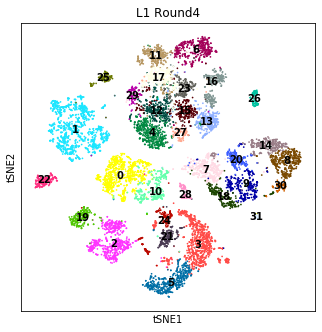

Round5 ...
Mean CV accuracy: 0.9194
Accuracy on the training set: 0.9686
Accuracy on the hold-out set: 0.9301


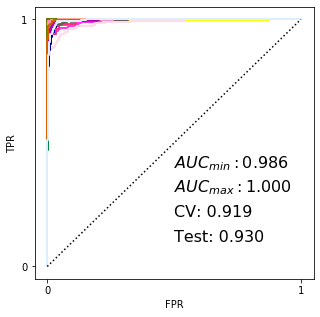

... storing 'L1_Round4_self-projection' as categorical


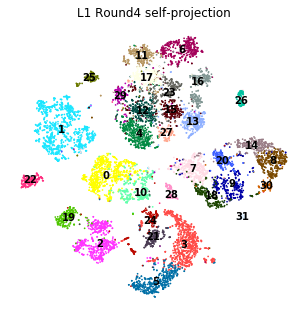

Accuracy on the training set: 0.9665
Accuracy on the hold-out set: 0.9252
Accuracy on the training set: 0.9661
Accuracy on the hold-out set: 0.9268
Max R1mat: 0.121827
Max R2mat: 0.005294
min_acc: 0.925210


<Figure size 360x360 with 0 Axes>

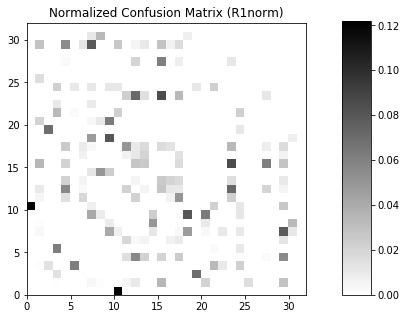

<Figure size 360x360 with 0 Axes>

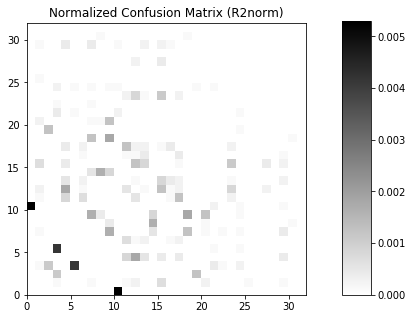

... storing 'L1_Round5' as categorical


IGRAPH U-W- 32 2 --
+ attr: weight (e)
+ edges:
0--10 0--10


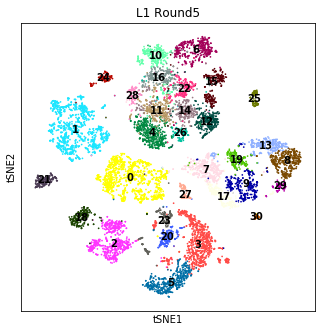

Round6 ...
Mean CV accuracy: 0.9183
Accuracy on the training set: 0.9634
Accuracy on the hold-out set: 0.9341


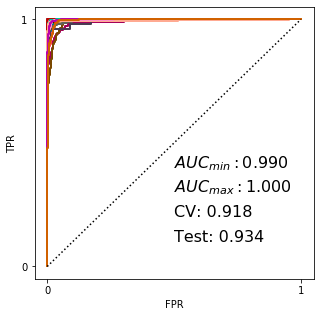

... storing 'L1_Round5_self-projection' as categorical


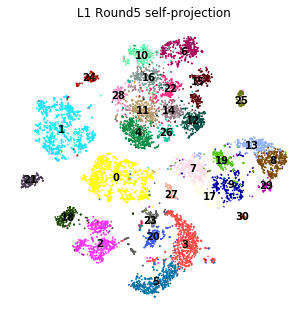

Accuracy on the training set: 0.9652
Accuracy on the hold-out set: 0.9325
Accuracy on the training set: 0.9730
Accuracy on the hold-out set: 0.9328
Max R1mat: 0.100000
Max R2mat: 0.005066
min_acc: 0.932509


<Figure size 360x360 with 0 Axes>

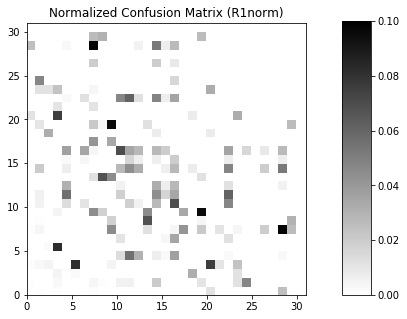

<Figure size 360x360 with 0 Axes>

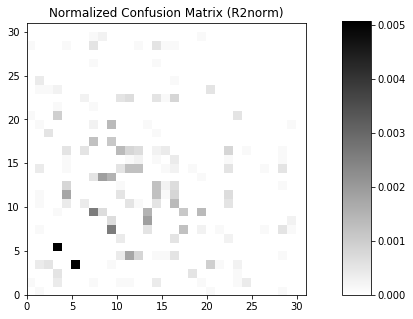

IGRAPH U-W- 31 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.100000
m2: 0.005066
Accuracy: 0.932509
start_iter: 5
R1norm_cutoff: 0.090000
R2norm_cutoff: 0.004066
Accuracy: 0.932509
Round6 ...
Mean CV accuracy: 0.9109
Accuracy on the training set: 0.9652
Accuracy on the hold-out set: 0.9326


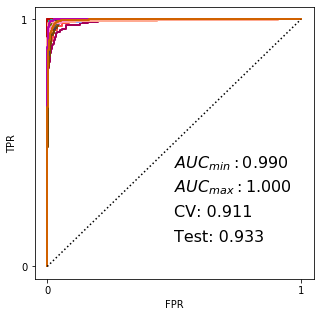

... storing 'L1_Round5_self-projection' as categorical


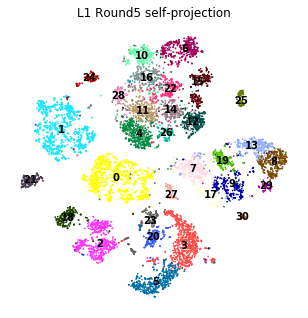

Accuracy on the training set: 0.9641
Accuracy on the hold-out set: 0.9330
Accuracy on the training set: 0.9612
Accuracy on the hold-out set: 0.9294
Max R1mat: 0.096386
Max R2mat: 0.003168
min_acc: 0.929351


<Figure size 360x360 with 0 Axes>

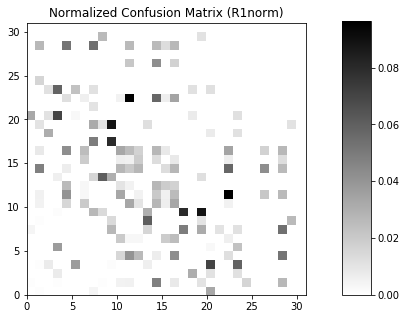

<Figure size 360x360 with 0 Axes>

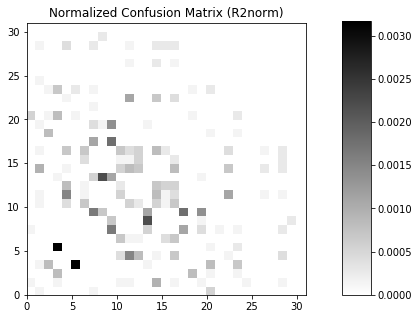

... storing 'L1_Round6' as categorical


IGRAPH U-W- 31 2 --
+ attr: weight (e)
+ edges:
11--22 11--22


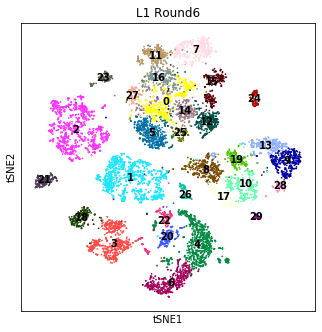

Round7 ...
Mean CV accuracy: 0.9211
Accuracy on the training set: 0.9674
Accuracy on the hold-out set: 0.9275


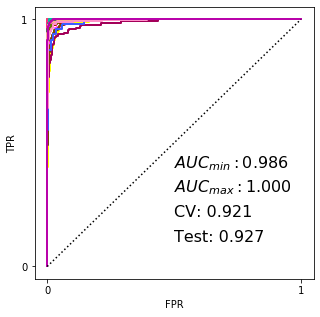

... storing 'L1_Round6_self-projection' as categorical


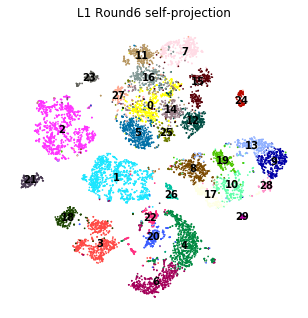

Accuracy on the training set: 0.9651
Accuracy on the hold-out set: 0.9297
Accuracy on the training set: 0.9705
Accuracy on the hold-out set: 0.9255
Max R1mat: 0.121212
Max R2mat: 0.004752
min_acc: 0.925536


<Figure size 360x360 with 0 Axes>

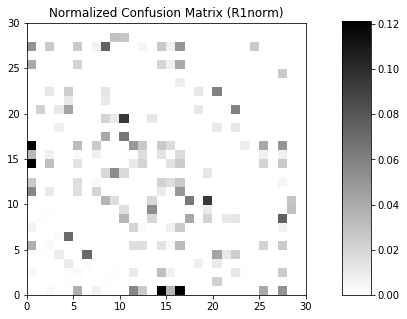

<Figure size 360x360 with 0 Axes>

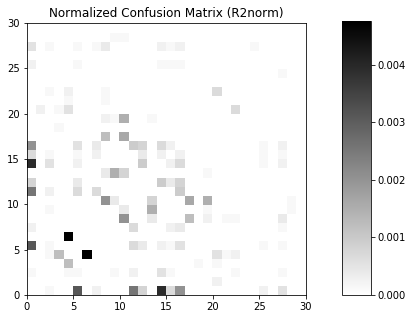

... storing 'L1_Round7' as categorical


IGRAPH U-W- 30 6 --
+ attr: weight (e)
+ edges:
0--14 0--16 10--19 0--14 0--16 10--19


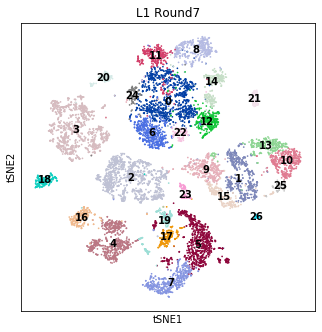

Round8 ...
Mean CV accuracy: 0.9255
Accuracy on the training set: 0.9727
Accuracy on the hold-out set: 0.9247


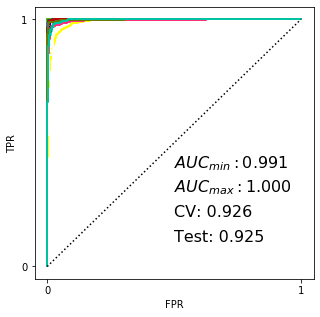

... storing 'L1_Round7_self-projection' as categorical


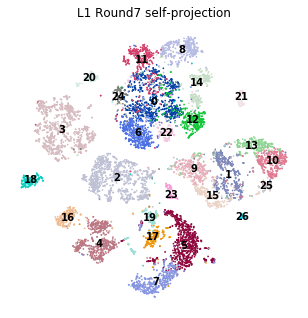

Accuracy on the training set: 0.9740
Accuracy on the hold-out set: 0.9245
Accuracy on the training set: 0.9788
Accuracy on the hold-out set: 0.9213
Max R1mat: 0.509804
Max R2mat: 0.008269
min_acc: 0.921326


<Figure size 360x360 with 0 Axes>

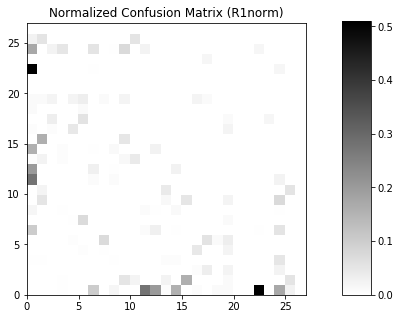

<Figure size 360x360 with 0 Axes>

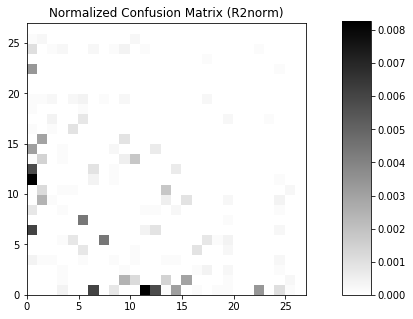

... storing 'L1_Round8' as categorical


IGRAPH U-W- 27 14 --
+ attr: weight (e)
+ edges:
0--6 0--11 0--12 0--14 0--22 0--24 1--15 0--6 0--11 0--12 0--14 1--15 0--22
0--24


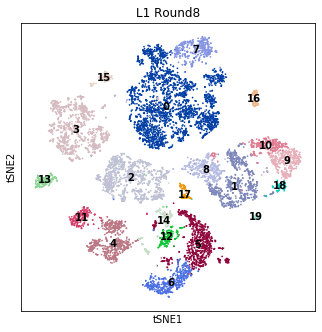

Round9 ...
Mean CV accuracy: 0.9613
Accuracy on the training set: 0.9859
Accuracy on the hold-out set: 0.9594


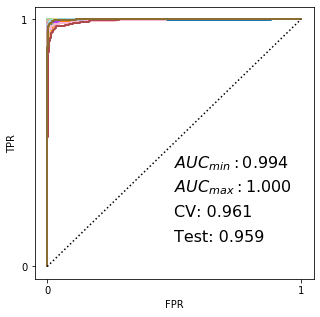

... storing 'L1_Round8_self-projection' as categorical


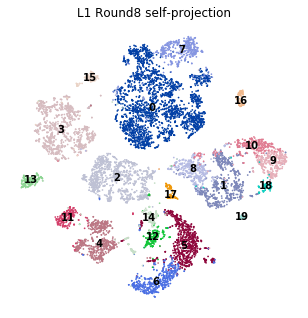

Accuracy on the training set: 0.9912
Accuracy on the hold-out set: 0.9573
Accuracy on the training set: 0.9853
Accuracy on the hold-out set: 0.9606
Max R1mat: 0.176471
Max R2mat: 0.006145
min_acc: 0.957321


<Figure size 360x360 with 0 Axes>

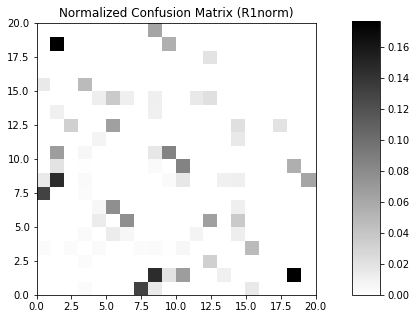

<Figure size 360x360 with 0 Axes>

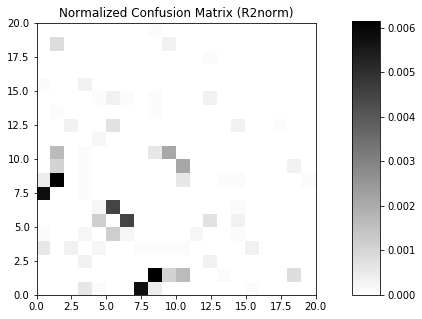

... storing 'L1_Round9' as categorical


IGRAPH U-W- 20 6 --
+ attr: weight (e)
+ edges:
0--7 1--8 1--18 0--7 1--8 1--18


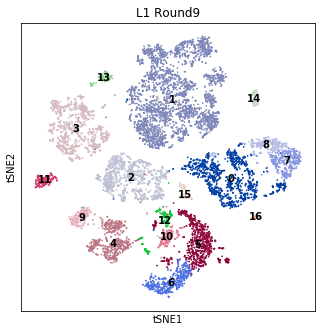

Round10 ...
Mean CV accuracy: 0.9591
Accuracy on the training set: 0.9891
Accuracy on the hold-out set: 0.9723


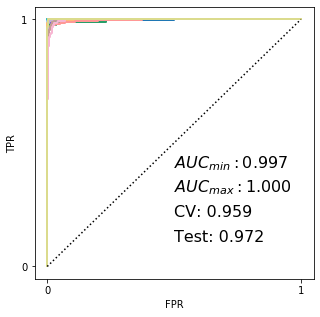

... storing 'L1_Round9_self-projection' as categorical


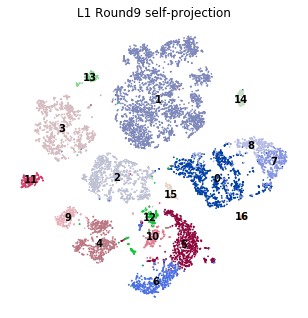

Accuracy on the training set: 0.9925
Accuracy on the hold-out set: 0.9713
Accuracy on the training set: 0.9891
Accuracy on the hold-out set: 0.9709
Max R1mat: 0.155689
Max R2mat: 0.003568
min_acc: 0.970924


<Figure size 360x360 with 0 Axes>

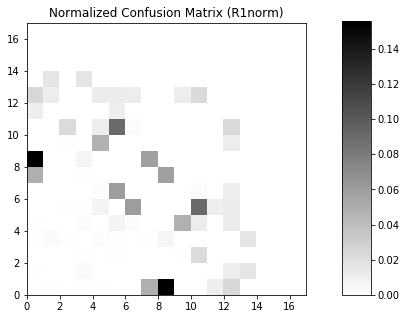

<Figure size 360x360 with 0 Axes>

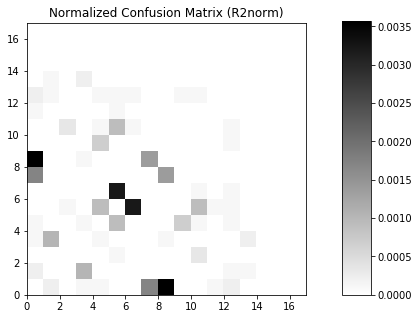

... storing 'L1_Round10' as categorical


IGRAPH U-W- 17 4 --
+ attr: weight (e)
+ edges:
0--8 5--10 0--8 5--10


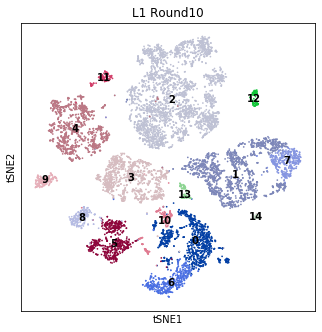

Round11 ...
Mean CV accuracy: 0.9646
Accuracy on the training set: 0.9850
Accuracy on the hold-out set: 0.9673


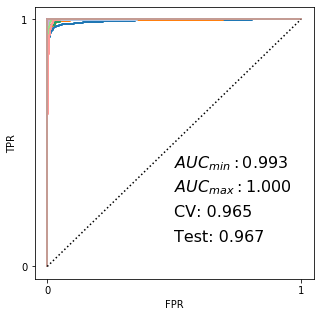

... storing 'L1_Round10_self-projection' as categorical


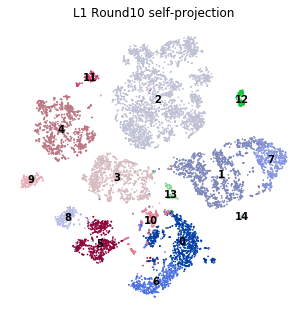

Accuracy on the training set: 0.9890
Accuracy on the hold-out set: 0.9671
Accuracy on the training set: 0.9906
Accuracy on the hold-out set: 0.9670
Max R1mat: 0.369048
Max R2mat: 0.011742
min_acc: 0.967017


<Figure size 360x360 with 0 Axes>

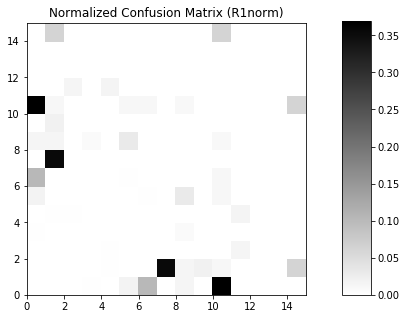

<Figure size 360x360 with 0 Axes>

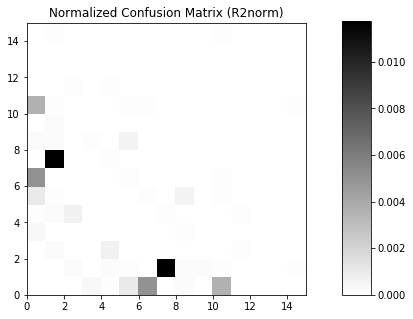

... storing 'L1_Round11' as categorical


IGRAPH U-W- 15 6 --
+ attr: weight (e)
+ edges:
0--6 0--10 1--7 0--6 1--7 0--10


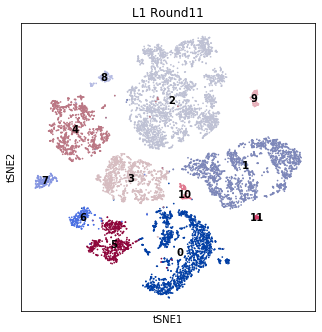

Round12 ...
Mean CV accuracy: 0.9847
Accuracy on the training set: 0.9990
Accuracy on the hold-out set: 0.9909


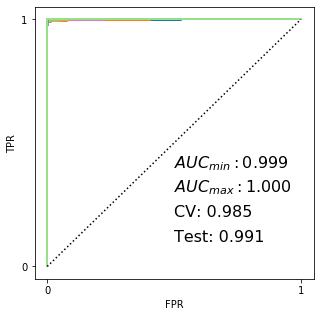

... storing 'L1_Round11_self-projection' as categorical


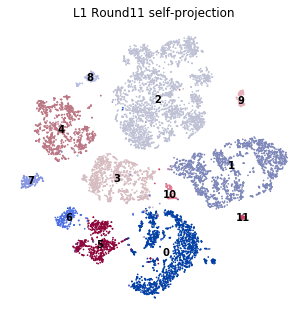

Accuracy on the training set: 0.9990
Accuracy on the hold-out set: 0.9886
Accuracy on the training set: 0.9980
Accuracy on the hold-out set: 0.9893
Max R1mat: 0.187500
Max R2mat: 0.001510
Converge SCCAF_optimize min_acc!
m1: 0.187500
m2: 0.001510
Accuracy: 0.988633


In [4]:
figsize(5,5)
SCCAF_optimize_all(min_acc=0.988, ad=ad, use='pca', basis ='tsne',low_res='louvain_r0.05',n=100)

In [5]:
ad.obs['L2_Round0'] = ad.obs['L1_Round11']

start_iter: 0
R1norm_cutoff: 0.500000
R2norm_cutoff: 0.050000
Accuracy: 0.000000
Round1 ...
Mean CV accuracy: 0.9867
Accuracy on the training set: 0.9980
Accuracy on the hold-out set: 0.9902


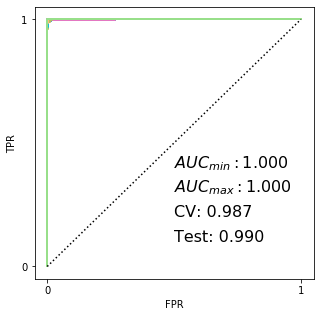

... storing 'L2_Round0_self-projection' as categorical


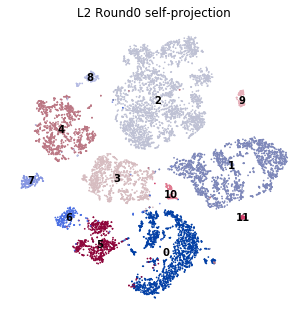

Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9910
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9912
Max R1mat: 0.035971
Max R2mat: 0.000869
min_acc: 0.990241


<Figure size 360x360 with 0 Axes>

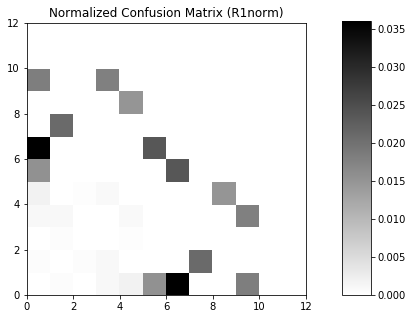

<Figure size 360x360 with 0 Axes>

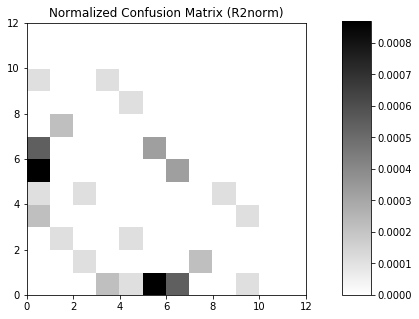

IGRAPH U-W- 12 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.035971
m2: 0.000869
Accuracy: 0.990241
start_iter: 0
R1norm_cutoff: 0.025971
R2norm_cutoff: -0.000131
Accuracy: 0.990241
Round1 ...
Mean CV accuracy: 0.9806
Accuracy on the training set: 0.9990
Accuracy on the hold-out set: 0.9895


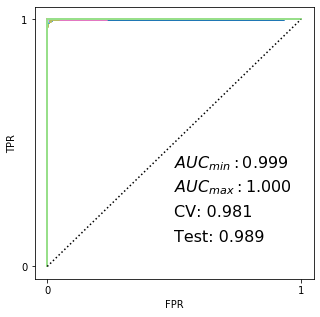

... storing 'L2_Round0_self-projection' as categorical


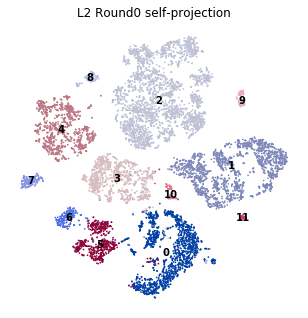

Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9914
Accuracy on the training set: 0.9990
Accuracy on the hold-out set: 0.9922
Max R1mat: 0.034483
Max R2mat: 0.001411
min_acc: 0.989491


<Figure size 360x360 with 0 Axes>

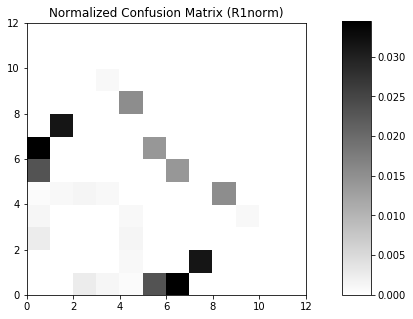

<Figure size 360x360 with 0 Axes>

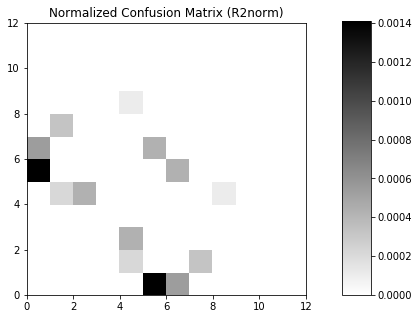

... storing 'L2_Round1' as categorical


IGRAPH U-W- 12 2 --
+ attr: weight (e)
+ edges:
0--6 0--6


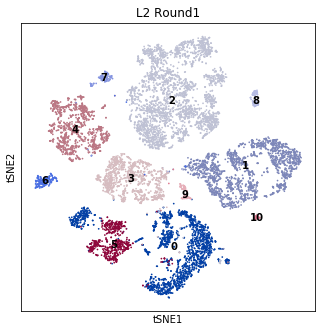

Round2 ...
Mean CV accuracy: 0.9909
Accuracy on the training set: 0.9989
Accuracy on the hold-out set: 0.9882


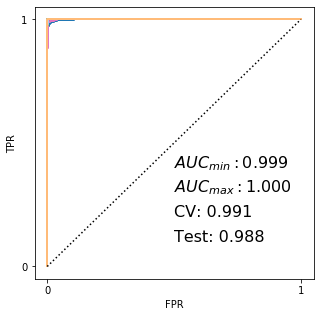

... storing 'L2_Round1_self-projection' as categorical


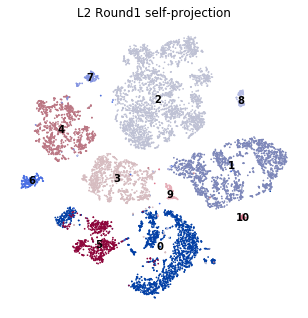

Accuracy on the training set: 0.9989
Accuracy on the hold-out set: 0.9904
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9846
Max R1mat: 0.081967
Max R2mat: 0.001841
min_acc: 0.984581


<Figure size 360x360 with 0 Axes>

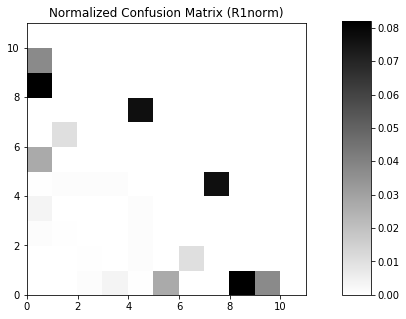

<Figure size 360x360 with 0 Axes>

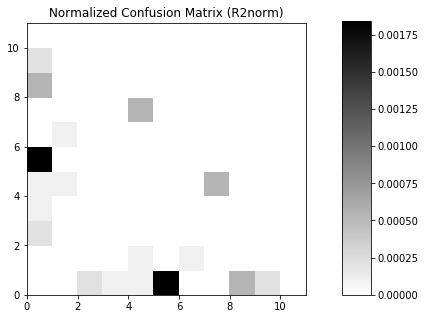

... storing 'L2_Round2' as categorical


IGRAPH U-W- 11 8 --
+ attr: weight (e)
+ edges:
0--5 0--8 0--9 4--7 0--5 4--7 0--8 0--9


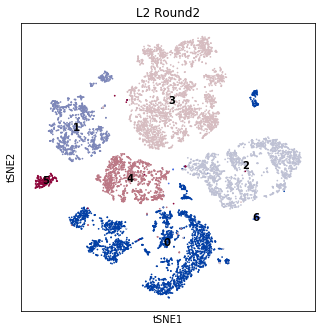

Round3 ...
Mean CV accuracy: 0.9919
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9950


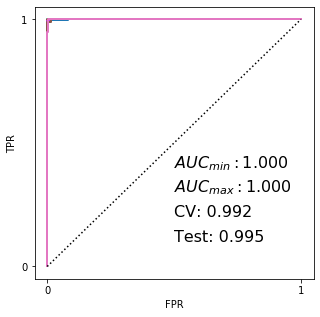

... storing 'L2_Round2_self-projection' as categorical


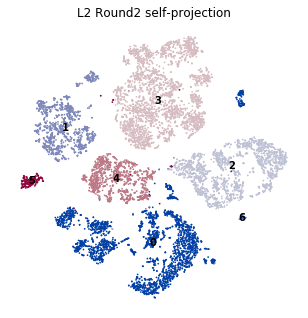

Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9948
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9968
Max R1mat: 0.010204
Max R2mat: 0.000104
Converge SCCAF_optimize min_acc!
m1: 0.010204
m2: 0.000104
Accuracy: 0.994840


In [8]:
SCCAF_optimize_all(min_acc=0.994, ad=ad, use='pca', basis ='tsne',low_res='louvain_r0.05',n=100, prefix='L2', use_projection=True)

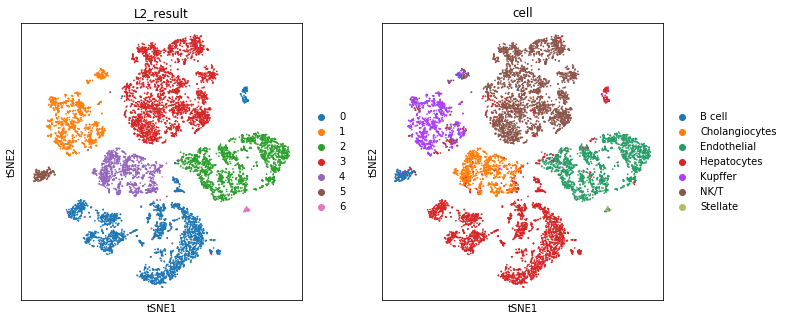

In [9]:
sc.pl.tsne(ad, color=['L2_result','cell'])

In [10]:
ad.write("../write/Aizarani2019Liver_reg.h5")

In [12]:
ls ../Reference-based/

776948.full.pdf
Aizarani_from_MacP.csv
Liver-Copy1.ipynb
Liver.ipynb
SingleR.ipynb
Untitled.ipynb
expMatrix_Park_MouseKidney_Oct_12_2018.rda
expMatrix_TM_Raw_Oct_12_2018.rda
sampTab_Park_MouseKidney_062118.rda
sampTab_TM_053018.rda
scClassify/
scClassify.ipynb
singleCellNet.ipynb
singler.temp/
xx.rds


In [64]:
df = pd.read_csv("../Reference-based/Aizarani_from_MacP_scClassify.csv",index_col=0)

In [66]:
df['x'].value_counts()

Hepatocytes                                                                               2728
ab T cells                                                                                2110
LSECs                                                                                     1718
Macrophages                                                                               1091
Cholangiocytes                                                                            1044
NK cells                                                                                   490
gd T cells                                                                                 245
Plasma cells                                                                               221
ab T cells_NK cells_gd T cells                                                             200
Mature B cells                                                                             159
unassigned                                        

In [16]:
ad.obs['scClassify'] = df['x']

In [20]:
ad.uns['scClassify_colors'] = default_20

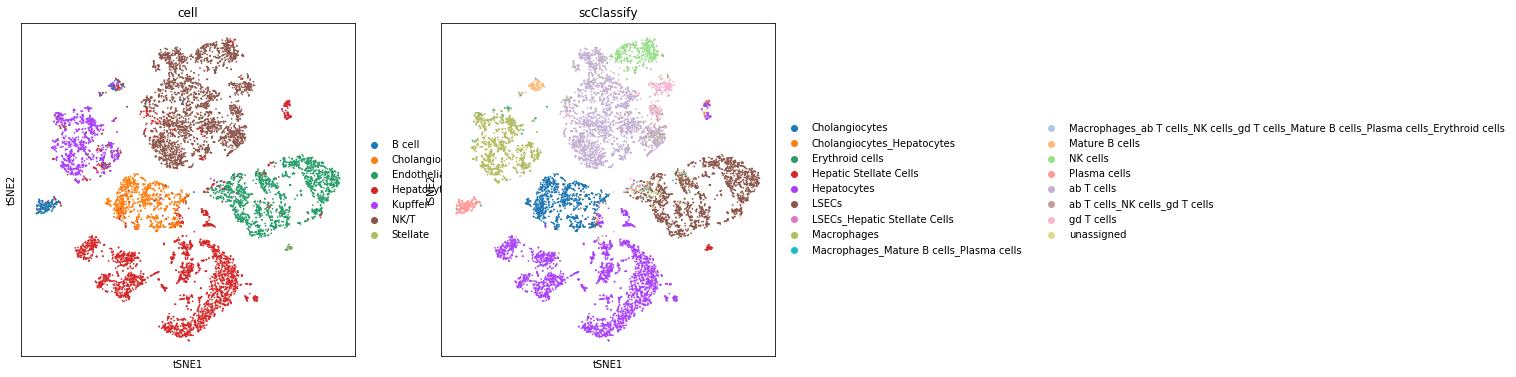

In [21]:
figsize(6,6)
sc.pl.tsne(ad, color=['cell','scClassify'])

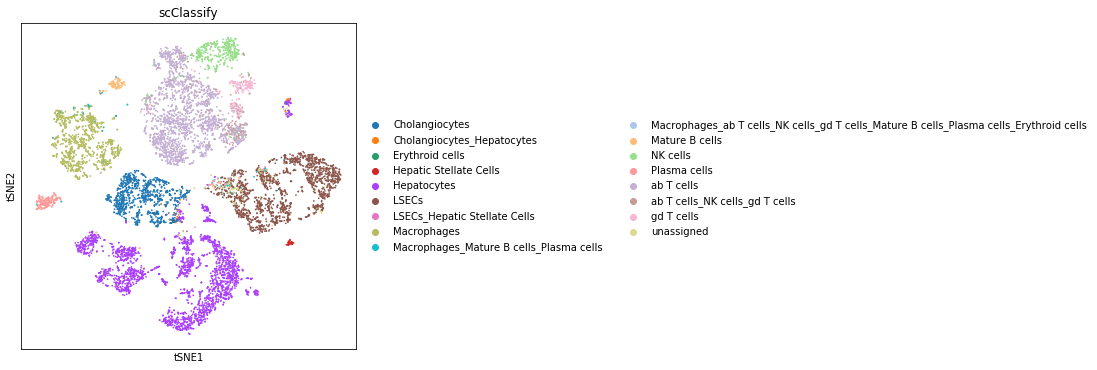

In [23]:
figsize(6,6)
sc.pl.tsne(ad, color=['scClassify'])

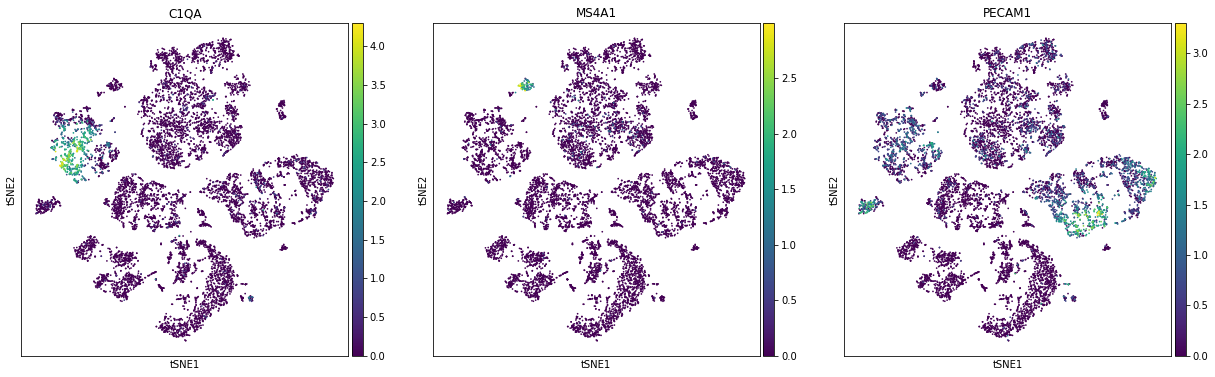

In [27]:
figsize(6,6)
sc.pl.tsne(ad, color=['C1QA','MS4A1','PECAM1'])

In [22]:
ad.write("../write/Aizarani2019Liver_reg.h5")

In [39]:
df = pd.read_csv("../Reference-based/Aizarani_from_MacP_singleCellNet.csv",index_col=0)

ad.obs['singleCellNet'] = df['x'][:-50].tolist()

In [46]:
ad.uns['singleCellNet_colors'] = default_20

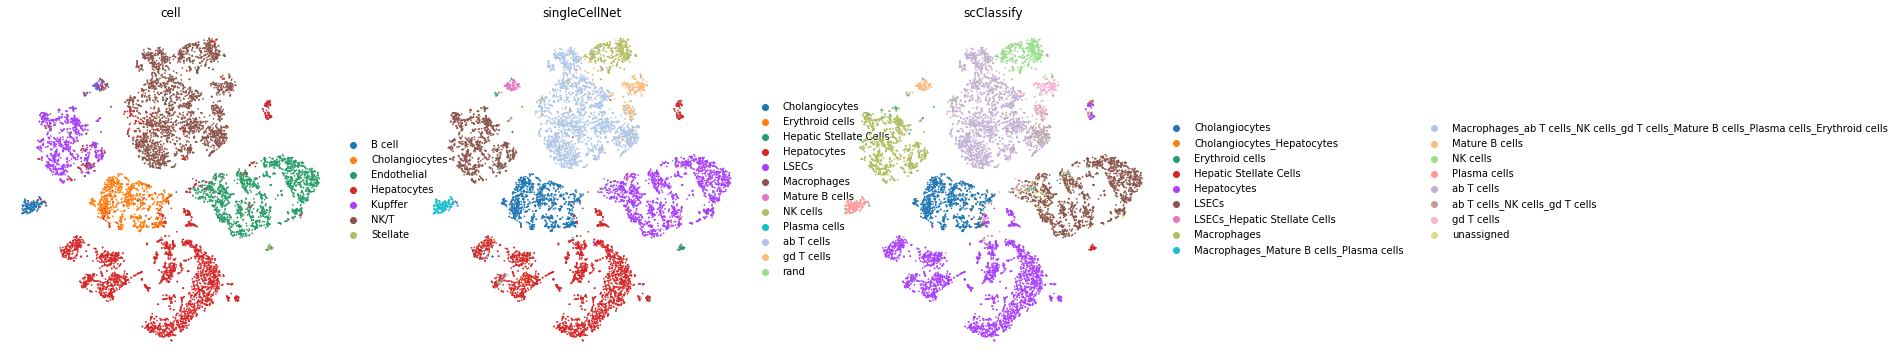

In [50]:
figsize(6,6)
sc.pl.tsne(ad, color=['cell','singleCellNet','scClassify'], frameon=False)

In [51]:
ad1 = sc.read("../write/MacParland2018Liver.h5")

In [55]:
ad1 = ad1[:,ad1.var_names.isin(ad.var_names)]

In [61]:
%%time
y_prob, y_pred, y_test, clf, cvsm, accuracy_test = SCCAF_assessment(ad1.X, \
                    ad1.obs['cell'], n=100)

ad.obs['LogisticRegression'] = clf.predict(ad[:,ad1.var_names].X)

Mean CV accuracy: 0.9696
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9801
CPU times: user 9.17 s, sys: 528 ms, total: 9.7 s
Wall time: 5.92 s


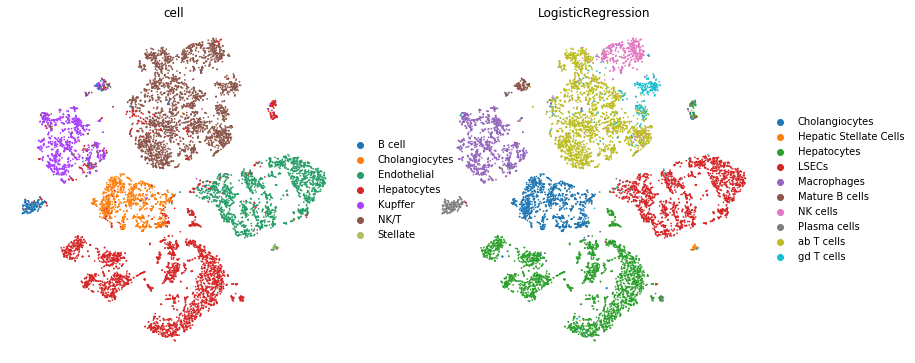

In [108]:
figsize(6,6)
sc.pl.tsne(ad, color=['cell','LogisticRegression'], frameon=False)

In [63]:
ad.write("../write/Aizarani2019Liver_reg.h5")

In [109]:
df = pd.read_csv("../Reference-based/Aizarani_from_MacP_SingleR.csv",index_col=0)

In [113]:
ad.obs['SingleR'] = df['x'].tolist()

In [115]:
ad.uns['SingleR_colors'] = default_20

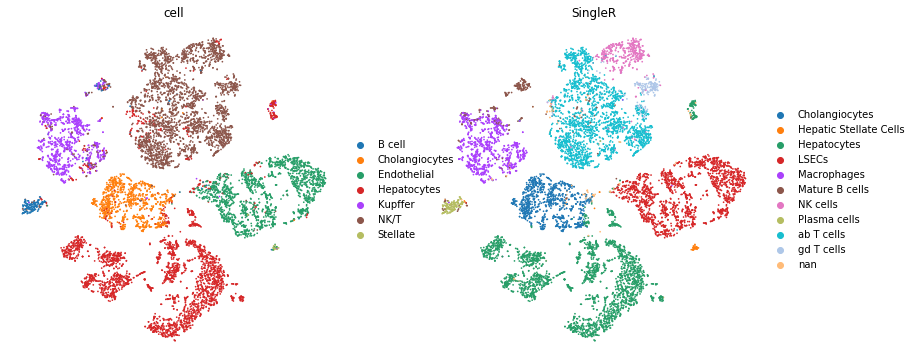

In [116]:
figsize(6,6)
sc.pl.tsne(ad, color=['cell','SingleR'], frameon=False)

In [117]:
ad.write("../write/Aizarani2019Liver_reg.h5")

# End